<a href="https://colab.research.google.com/github/dc-neo/movie_plot/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Engineering

```
# This is formatted as code
```



In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 37.2 MB/s eta 0:00:00


In [ ]:
!pip install -q "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 31.0 MB/s eta 0:00:00


In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.getcwd()
os.chdir('/content/gdrive/MyDrive/Colab Notebooks')
os.getcwd()

'/content/gdrive/MyDrive/Colab Notebooks'

In [ ]:
import sqlite3
import pandas as pd
sql = """
SELECT p.* FROM plot_nlp p
"""
with sqlite3.connect('movie_plots.db') as con:
    df = pd.read_sql_query(sql, con)

In [ ]:
df.head()

,index,release_year,title,originethnicity,director,cast,genre,wiki_page,plot,plot_clean,plot_lemma,plot_nouns,plot_adjectives,plot_verbs,plot_nav,no_tokens
0,0,1997,Arasiyal,Tamil,R. K. Selvamani,"Mammootty, Shilpa Shirodkar, Roja\r\n",unknown,https://en.wikipedia.org/wiki/Arasiyal,Chandrasekhar (Mammootty) is an honest collect...,Chandrasekhar (Mammootty) is an honest collect...,Chandrasekhar ( Mammootty ) be an honest colle...,Chandrasekhar Mammootty collector Vikram Anand...,honest international hopeless corrupt honest a...,arrest transfer eradicate have meet suspect ta...,Chandrasekhar Mammootty collector Vikram Anand...,327
1,1,2002,Yeh Mohabbat Hai,Bollywood,Unknown,"Rahul Bhatt, Johnny Lever",unknown,https://en.wikipedia.org/wiki/Yeh_Mohabbat_Hai,Yeh Mohabbat Hai revolves around Chand & Shahe...,Yeh Mohabbat Hai revolves around Chand & Shahe...,Yeh Mohabbat Hai revolve around Chand & Shahee...,Yeh Mohabbat Hai Chand Shaheen lover childhood...,opposite sufficient innocent,revolve gather play trap claim have convict be...,Yeh Mohabbat Hai Chand Shaheen lover childhood...,113
2,2,2010,Aridhu Aridhu,Tamil,K. R. Mathivannan,"Harish Kalyan, Uttara Raj, Princess Jasmine",unknown,https://en.wikipedia.org/wiki/Aridhu_Aridhu,"The film has been shot in Chennai, Australia a...","The film has been shot in Chennai, Australia a...","the film have be shoot in Chennai , Australia ...",film Chennai Australia New Zealand film terror...,,shoot deal happen,film Chennai Australia New Zealand film terror...,27
3,3,2011,Varnam,Tamil,S. M. Raju,"Giri, Ashwatha, Monica, Sampath Raj",unknown,https://en.wikipedia.org/wiki/Varnam_(2011_film),Mani (Giri) becomes a spoiled brat after his f...,Mani (Giri) becomes a spoiled brat after his f...,Mani ( Giri ) become a spoiled brat after his ...,Mani Giri brat father death caste clash Mani m...,spoiled rich own dear,become send enjoy wait revenge fall influence ...,Mani Giri brat father death caste clash Mani m...,169
4,4,2012,Les Misérables,British,Director: Tom Hooper,"Director: Tom Hooper\r\nCast: Hugh Jackman, Ru...",unknown,https://en.wikipedia.org/wiki/Les_Mis%C3%A9rab...,"In 1815, French prisoner Jean Valjean is relea...","In 1815, French prisoner Jean Valjean is relea...","in 1815 , french prisoner Jean Valjean be rele...",prisoner Jean Valjean parole Bagne Toulon year...,french multiple kindly worthwhile valjean new ...,release serve steal try escape parole prevent ...,prisoner Jean Valjean parole Bagne Toulon year...,739


In [ ]:
df.describe()

,index,release_year,no_tokens
count,4960.000000,4960.000000,4960.000000
mean,2479.500000,1973.991532,438.094960
std,1431.972998,27.960771,372.796916
min,0.000000,1902.000000,6.000000
25%,1239.750000,1950.000000,140.000000
50%,2479.500000,1973.000000,336.000000
75%,3719.250000,2001.000000,697.000000
max,4959.000000,2017.000000,5893.000000


In [ ]:
df = df.rename(columns={"plot": "plot_describe"})

In [ ]:
train_raw = df

In [ ]:
train_raw = train_raw[train_raw.plot_describe.notnull()]
train_raw.shape

(4960, 16)

<Axes: ylabel='Frequency'>

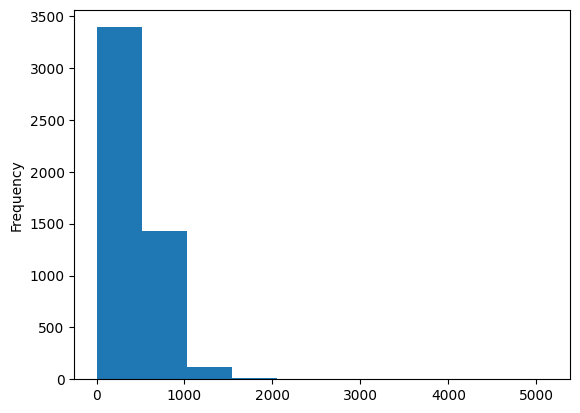

In [ ]:
train_raw.plot_describe.apply(lambda x: len(x.split())).plot(kind='hist')


In [ ]:
train_raw['len_txt'] =train_raw.plot_describe.apply(lambda x: len(x.split()))
train_raw.describe()

,index,release_year,no_tokens,len_txt
count,4960.000000,4960.000000,4960.000000,4960.000000
mean,2479.500000,1973.991532,438.094960,376.079839
std,1431.972998,27.960771,372.796916,320.038318
min,0.000000,1902.000000,6.000000,5.000000
25%,1239.750000,1950.000000,140.000000,119.000000
50%,2479.500000,1973.000000,336.000000,288.000000
75%,3719.250000,2001.000000,697.000000,602.000000
max,4959.000000,2017.000000,5893.000000,5130.000000


In [ ]:
train_raw = train_raw[train_raw.len_txt > 249]
train_raw.shape

(2689, 17)

In [ ]:
train_raw = train_raw[['plot_describe', 'genre']]
train_raw.reset_index(inplace=True, drop=True)
train_raw.head()

,plot_describe,genre
0,Chandrasekhar (Mammootty) is an honest collect...,unknown
1,"In 1815, French prisoner Jean Valjean is relea...",unknown
2,"In 1982 Brooklyn, a boy named Charlie Carbone ...",unknown
3,Secret Agent 116 named Gopal has been assigned...,unknown
4,The story follows the life of Ryunosuke Tsukue...,unknown


In [ ]:
import numpy as np
for l in np.unique(train_raw['genre']):
  print(l)

action
adventure
comedy
crime
crime drama
drama
film noir
horror
musical
mystery
romance
romantic comedy
science fiction
thriller
unknown
western


<Axes: >

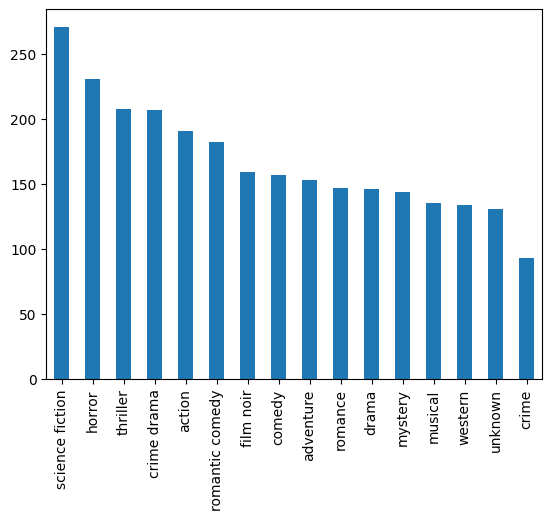

In [ ]:
train_raw['genre'].value_counts().sort_values(ascending=False).plot(kind='bar')


In [ ]:
train_raw=train_raw.rename(columns = {'plot_describe':'text', 'genre':'label'})
train_raw.head()

,text,label
0,Chandrasekhar (Mammootty) is an honest collect...,unknown
1,"In 1815, French prisoner Jean Valjean is relea...",unknown
2,"In 1982 Brooklyn, a boy named Charlie Carbone ...",unknown
3,Secret Agent 116 named Gopal has been assigned...,unknown
4,The story follows the life of Ryunosuke Tsukue...,unknown


In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
train_raw['label'] = LE.fit_transform(train_raw['label'])
train_raw.head()


,text,label
0,Chandrasekhar (Mammootty) is an honest collect...,14
1,"In 1815, French prisoner Jean Valjean is relea...",14
2,"In 1982 Brooklyn, a boy named Charlie Carbone ...",14
3,Secret Agent 116 named Gopal has been assigned...,14
4,The story follows the life of Ryunosuke Tsukue...,14


In [ ]:
len(np.unique(train_raw['label']))

16

In [ ]:
train = train_raw.copy()

In [ ]:
train = train.reindex(np.random.permutation(train.index))
train.head()

,text,label
40,The movie starts with SEES' battle in a full m...,14
1211,"Jules Vincent, a French-Canadian trapper (Stew...",15
2182,"Following a nuclear holocaust, the world has b...",12
2393,When the remains of a woman's body are found a...,6
800,"In 1980, mercenaries Danny Bryce (Jason Statha...",0


In [ ]:
import re
def clean_txt(text):
  text = re.sub("'", "",text)
  text=re.sub("(\W)+"," ",text)
  return text

In [ ]:
train['text']  = train.text.apply(clean_txt)
train.head()

,text,label
40,The movie starts with SEES battle in a full mo...,14
1211,Jules Vincent a French Canadian trapper Stewar...,15
2182,Following a nuclear holocaust the world has be...,12
2393,When the remains of a womans body are found af...,6
800,In 1980 mercenaries Danny Bryce Jason Statham ...,0


In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=0.2, random_state=35)
train.head()


,text,label
173,Billie Jean Davy a teenager in Corpus Christi ...,5
396,Sunder Srivastava Shah Rukh Khan is a young gr...,2
2638,The film begins with a title card describing H...,9
169,Charlie is a young Italian American man in New...,5
65,Manimaran M G Ramachandran is a doctor living ...,14


In [ ]:
train.reset_index(drop=True, inplace=True)
train.head(2)

,text,label
0,Billie Jean Davy a teenager in Corpus Christi ...,5
1,Sunder Srivastava Shah Rukh Khan is a young gr...,2


In [ ]:
val.reset_index(drop=True, inplace=True)
val.head(2)


,text,label
0,Detectives Liam Casey Ian Holm and Joey Allegr...,4
1,In Cambodia 1975 the eight year old Wai Lok ya...,0


In [ ]:
# Set the output directory for saving model file
OUTPUT_DIR = './bert_genre'

#@markdown Whether or not to clear/delete the directory and create a new one
DO_DELETE = False #@param {type:"boolean"}

if DO_DELETE:
  try:
    tf.io.gfile.DeleteRecursively(OUTPUT_DIR)
  except:
    pass

tf.io.gfile.makedirs(OUTPUT_DIR)
print('***** Model output directory: {} *****'.format(OUTPUT_DIR))

***** Model output directory: ./bert_genre *****


In [ ]:
val.shape, train.shape

((538, 2), (2151, 2))

In [ ]:
DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'
# The list containing all the classes (train['SECTION'].unique())
label_list = [x for x in np.unique(train.label)]
label_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [ ]:
def get_split(text1):
  l_total = []
  l_parcial = []
  if len(text1.split())//150 >0:
    n = len(text1.split())//150
  else:
    n = 1
  for w in range(n):
    if w == 0:
      l_parcial = text1.split()[:200]
      l_total.append(" ".join(l_parcial))
    else:
      l_parcial = text1.split()[w*150:w*150 + 200]
      l_total.append(" ".join(l_parcial))
  return l_total

In [ ]:
train['text_split'] = train[DATA_COLUMN].apply(get_split)
train.head()

,text,label,text_split
0,Billie Jean Davy a teenager in Corpus Christi ...,5,[Billie Jean Davy a teenager in Corpus Christi...
1,Sunder Srivastava Shah Rukh Khan is a young gr...,2,[Sunder Srivastava Shah Rukh Khan is a young g...
2,The film begins with a title card describing H...,9,[The film begins with a title card describing ...
3,Charlie is a young Italian American man in New...,5,[Charlie is a young Italian American man in Ne...
4,Manimaran M G Ramachandran is a doctor living ...,14,[Manimaran M G Ramachandran is a doctor living...


In [ ]:
val['text_split'] = val[DATA_COLUMN].apply(get_split)
val.head(2)

,text,label,text_split
0,Detectives Liam Casey Ian Holm and Joey Allegr...,4,[Detectives Liam Casey Ian Holm and Joey Alleg...
1,In Cambodia 1975 the eight year old Wai Lok ya...,0,[In Cambodia 1975 the eight year old Wai Lok y...


In [ ]:
train_l = []
label_l = []
index_l =[]
for idx,row in train.iterrows():
  for l in row['text_split']:
    train_l.append(l)
    label_l.append(row['label'])
    index_l.append(idx)
len(train_l), len(label_l), len(index_l)

(7494, 7494, 7494)

In [ ]:
val_l = []
val_label_l = []
val_index_l = []
for idx,row in val.iterrows():
  for l in row['text_split']:
    val_l.append(l)
    val_label_l.append(row['label'])
    val_index_l.append(idx)
len(val_l), len(val_label_l), len(val_index_l)


(1897, 1897, 1897)

In [ ]:
train_df = pd.DataFrame({DATA_COLUMN:train_l, LABEL_COLUMN:label_l})
train_df.head()


,text,label
0,Billie Jean Davy a teenager in Corpus Christi ...,5
1,helpful and understanding Mr Pyatt then propos...,5
2,Jean becomes a teen icon and young fans follow...,5
3,Sunder Srivastava Shah Rukh Khan is a young gr...,2
4,talking with a ghost and panics The ghost sudd...,2


In [ ]:
val_df = pd.DataFrame({DATA_COLUMN:val_l, LABEL_COLUMN:val_label_l})
val_df.head()

,text,label
0,Detectives Liam Casey Ian Holm and Joey Allegr...,4
1,attorney Sam Vigoda Richard Dreyfuss agrees to...,4
2,precincts who responded to the Washington shoo...,4
3,In Cambodia 1975 the eight year old Wai Lok ya...,0
4,a bulletproof vest and the assassination hit f...,0


In [ ]:
train_df = train_df[:1000]
len(train_df)

1000

In [ ]:
val_df = val_df[:1000]
len(val_df)

1000

In [ ]:
import os

if tf.config.list_physical_devices('GPU'):
  strategy = tf.distribute.MirroredStrategy()
  print('Using GPU')
else:
  raise ValueError('Running on CPU is not recommended.')

Using GPU


In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
text_test = ["In November 1999, tourists and fans of The Blair Witch Project descend on the small town of Burkittsville, Maryland, where the film is set. Local resident Jeff, a former psychiatric patient and obsessed fan, orchestrates a group tour of locations featured in the film. Among the group are graduate students Stephen and his pregnant girlfriend, Tristen, who are researching mythology and mass hysteria; Erica, the Wiccan daughter of an Episcopal minister; and Kim, a goth psychic. They camp for the night in the ruins of Rustin Parr's house, where Jeff has placed surveillance cameras, hoping to capture any supernatural occurrences. Jeff becomes unnerved when he notices a large tree located in the center of the house's foundation, claiming it was not there before. That night, another tour group arrives at the ruins claiming to have jurisdiction over the grounds; Jeff and Stephen mislead them to instead visit Coffin Rock, lying and saying they witnessed something horrifying there earlier. The other tour group believes them, and leaves for Coffin Rock.\r\nAfter drinking and smoking marijuana all night, the group awaken in the morning to find Stephen and Tristen's research documents shredded and strewn through the woods, and Jeff's cameras destroyed. Kim has a psychic inclination that the tapes are buried under the foundation, the same place that The Blair Witch Project footage was allegedly discovered; when Jeff inspects the area, he finds his tapes."]
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_type_ids', 'input_mask', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [  101  1999  2281  2639  1010  9045  1998  4599  1997  1996 10503  6965]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.9989498   0.85281426 -0.22712009 -0.05797565  0.4194847  -0.98172265
  0.9947367  -0.5792831  -0.52613693 -0.33616439 -0.3199377  -0.14616072]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.32273373 -0.13188249  1.1485767  ... -0.55093515 -0.06131949
  -0.251258  ]
 [ 0.35127687 -0.43778926  0.27465153 ... -0.13802998 -0.60255635
   1.0800979 ]
 [-0.9193435  -0.36827573  0.6837073  ... -1.0991664   0.01337066
   1.4583144 ]
 ...
 [-1.2403724   1.0672042  -0.51987255 ... -0.97250336 -0.5043497
   0.31681234]
 [-1.5204936  -0.23683181  1.2399516  ... -0.6755755   0.12669282
  -0.6299886 ]
 [-1.7674593   1.1438854   1.2461004  ... -0.5140997   0.6445636
   0.01616897]]


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.6716379]], shape=(1, 1), dtype=float32)


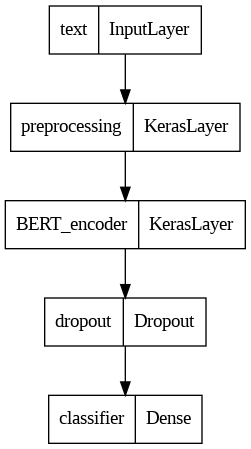

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.metrics.CategoricalAccuracy()

In [ ]:
train_df.head()

,text,label
0,Billie Jean Davy a teenager in Corpus Christi ...,5
1,helpful and understanding Mr Pyatt then propos...,5
2,Jean becomes a teen icon and young fans follow...,5
3,Sunder Srivastava Shah Rukh Khan is a young gr...,2
4,talking with a ghost and panics The ghost sudd...,2


In [ ]:
len(train_df)

1000

In [ ]:
  import torch
  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  use_cuda

True

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import DistilBertTokenizer, DistilBertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
#tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
encoded_data = tokenizer.batch_encode_plus(train_df.text.values, add_special_tokens=True, return_attention_mask=True, truncation=True, pad_to_max_length=True, max_length=256, return_tensors='pt')
input_ids = encoded_data['input_ids'].to("cuda")
attention_masks = encoded_data['attention_mask'].to("cuda")
labels = torch.tensor(train_df.label.values).to("cuda")

# Load the pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=16, output_attentions=False, output_hidden_states=False).to('cuda')
#model = DistilBertModel.from_pretrained("distilbert-base-uncased").to("cuda")

# Define the training parameters
batch_size = 5
epochs = 5
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

# Train the model
for epoch in range(epochs):
   model.train()
   for i in range(0, input_ids.size(0), batch_size):
       optimizer.zero_grad()
       outputs = model(input_ids[i:i+batch_size], attention_mask=attention_masks[i:i+batch_size], labels=labels[i:i+batch_size])
       loss = outputs.loss
       loss.backward()
       optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
  outputs = model(input_ids, attention_mask=attention_masks)
  predictions = torch.argmax(outputs[0], dim=1).flatten()
  accuracy = torch.sum(predictions == labels) / len(labels)

print("Accuracy:", accuracy.item())

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.8360000252723694
